In [205]:
from __future__ import print_function
import torch

### Construct a 5x3 matrix, uninitialized:

In [206]:
x = torch.empty(5,3)
print(x)

tensor([[0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000]])


### Construct a randomly initialized matrix:

In [207]:
x = torch.rand(5,3)
print(x)

tensor([[0.2347, 0.0058, 0.6695],
        [0.6357, 0.4514, 0.6864],
        [0.9146, 0.3316, 0.3031],
        [0.2419, 0.0025, 0.3771],
        [0.7938, 0.8325, 0.0431]])


### Construct a matrix filled zeros and of dtype long:

In [208]:
x = torch.zeros(5,3,dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


### Construct a tensor directly from data:

In [209]:
x = torch.tensor([5.5,3])
print(x)

tensor([5.5000, 3.0000])


#### or create a tensor based on an existing tensor. These methods will reuse properties of the input tensor, e.g. dtype, unless new values are provided by user

In [210]:
x = x.new_ones(5,3,dtype=torch.double) #new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float) # override dtype!
print(x)                                # result has the same size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-1.1011, -0.6309,  0.0223],
        [ 1.6094,  0.0415, -0.8301],
        [ 0.8951, -0.6905, -1.8174],
        [ 0.2728,  1.1917, -1.0500],
        [-0.4964,  1.0674,  0.4957]])


In [211]:
#Get its size:
print(x.size())

torch.Size([5, 3])


### Addition: 

In [212]:
#syntax 1
y = torch.rand(5,3)
print(x + y)

tensor([[-0.8774, -0.3552,  0.8224],
        [ 2.3890,  0.6026,  0.1693],
        [ 1.6583, -0.5229, -1.1811],
        [ 0.7415,  1.2423, -0.2286],
        [-0.0472,  1.2567,  0.9149]])


In [213]:
#syntax 2
print(torch.add(x,y))

tensor([[-0.8774, -0.3552,  0.8224],
        [ 2.3890,  0.6026,  0.1693],
        [ 1.6583, -0.5229, -1.1811],
        [ 0.7415,  1.2423, -0.2286],
        [-0.0472,  1.2567,  0.9149]])


In [214]:
#providing an output tensor as argument
result = torch.empty(5,3)
torch.add(x,y,out=result)
print(result)

tensor([[-0.8774, -0.3552,  0.8224],
        [ 2.3890,  0.6026,  0.1693],
        [ 1.6583, -0.5229, -1.1811],
        [ 0.7415,  1.2423, -0.2286],
        [-0.0472,  1.2567,  0.9149]])


In [215]:
#in-place
#add x to y
y.add_(x)
print(y)
#Any operation that mutates a tensor in-place is post-fixed with an _. 
#For example: x.copy_(y), x.t_(), will change x.

tensor([[-0.8774, -0.3552,  0.8224],
        [ 2.3890,  0.6026,  0.1693],
        [ 1.6583, -0.5229, -1.1811],
        [ 0.7415,  1.2423, -0.2286],
        [-0.0472,  1.2567,  0.9149]])


In [216]:
#You can use standard NumPy-like indexing with all bells and whistles!
print(x[:,1])

tensor([-0.6309,  0.0415, -0.6905,  1.1917,  1.0674])


In [217]:
#Resizing: If you want to resize/reshape tensor, you can use torch.view:
x = torch.randn(4,4)
y = x.view(16)
z = x.view(-1,8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [218]:
#If you have a one element tensor, use .item() to get the value as a Python number
x = torch.randn(1)
print(x)
print(x.item())

tensor([2.1111])
2.1110589504241943


# NumPy Bridge

#### Converting a Torch Tensor to a NumPy array and vice versa is a breeze.

#### The Torch Tensor and NumPy array will share their underlying memory locations, 
#### and changing one will change the other.

### Converting a Torch Tensor to a NumPy Array

In [219]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [220]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [221]:
#See how the numpy array changed in value.
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


### Converting NumPy Array to Torch Tensor

In [222]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a,1,out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


### CUDA Tensors

#### Tensors can be moved onto any device using the .to method.

In [223]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

### Autograd: automatic differentiation

In [224]:
x = torch.ones(2,2,requires_grad = True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [225]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward>)


In [226]:
print(y.grad_fn) #y was created as a result of an operation, so it has a grad_fn.

In [227]:
z = y*y*3
out = z.mean()
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward>) tensor(27., grad_fn=<MeanBackward1>)


In [228]:
a = torch.randn(2,2)
a = ((a*3)/(a-1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a*a).sum()
print(b.grad_fn)

False
True


### Gradients

#### Let’s backprop now Because out contains a single scalar, out.backward() is equivalent to out.backward(torch.tensor(1))

In [229]:
out.backward()

In [230]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [231]:
x = torch.randn(3,requires_grad = True)
y = x*2
while y.data.norm() < 1000:
    y = y*2
print(y)

tensor([ -327.8909, -1657.4404,  -613.5605], grad_fn=<MulBackward>)


In [232]:
y

tensor([ -327.8909, -1657.4404,  -613.5605], grad_fn=<MulBackward>)

In [233]:
y.data.norm()

tensor(1797.5199)

In [234]:
0.7772*0.7772+0.5340*0.5340+4.4317*4.4317

20.52916073

In [235]:
4.5309*4.5309

20.529054809999998

In [236]:
gradients = torch.tensor([0.1,1.0,0.001],dtype=torch.float)
y.backward(gradients)
print(x.grad)

tensor([ 409.6000, 4096.0000,    4.0960])


#### You can also stop autograd from tracking history on Tensors with
#### .requires_grad``=True by wrapping the code block in ``with torch.no_grad():

In [237]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
    print((x**2).requires_grad)

True
True
False


### Neural Networks
#### Neural networks can be constructed using the torch.nn package.

#### Now that you had a glimpse of autograd, nn depends on autograd to define models and 
#### differentiate them. An nn.Module contains layers, and a method forward(input)that returns the output.

In [238]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)),(2))# If the size is a square you can only specify a single number
        x = x.view(-1,self.num_flat_features(x))
        x = F.relu((self.fc1(x)))
        x = F.relu((self.fc2(x)))
        x = self.fc3(x)
        return x

    def num_flat_features(self,x):
        size = x.size()[1:]# all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [239]:
params = list(net.parameters())
print(len(params))
print(params[0].size())# conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [240]:
for i in range(len(params)):
    print(i,params[i].size())

0 torch.Size([6, 1, 5, 5])
1 torch.Size([6])
2 torch.Size([16, 6, 5, 5])
3 torch.Size([16])
4 torch.Size([120, 400])
5 torch.Size([120])
6 torch.Size([84, 120])
7 torch.Size([84])
8 torch.Size([10, 84])
9 torch.Size([10])


In [241]:
input = torch.randn(1,1,32,32)
out = net(input)
print(out)

tensor([[-0.1460,  0.0916, -0.0916, -0.0972, -0.0236,  0.0888,  0.0363,  0.0627,
         -0.1611,  0.1572]], grad_fn=<ThAddmmBackward>)


In [242]:
net.zero_grad()
out.backward(torch.randn(1,10))

# Note

#### torch.nn only supports mini-batches. The entire torch.nn package only supports inputs that are a mini-batch of samples, and not a single sample.

#### For example, nn.Conv2d will take in a 4D Tensor of nSamples x nChannels x Height x Width.

#### If you have a single sample, just use input.unsqueeze(0) to add a fake batch dimension.

In [243]:
output = net(input)
target = torch.randn(10)
target = target.view(1,-1)
criterion = nn.MSELoss()

loss = criterion(output,target)
print(loss)

tensor(0.7429, grad_fn=<MseLossBackward>)


In [244]:
print(loss.grad_fn)# MSELoss
print(loss.grad_fn.next_functions[0][0])# Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0]) # ReLU

In [245]:
net.zero_grad()# zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0072,  0.0051, -0.0114,  0.0034, -0.0021, -0.0052])


### Update the weights
### The simplest update rule used in practice is the Stochastic Gradient Descent (SGD):

### weight = weight - learning_rate * gradient
### We can implement this using simple python code:

In [246]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [247]:
import torch.optim as optim
# create your optimizer
optimizer = optim.SGD(net.parameters(),lr=0.01)

#in your training loop:
optimizer.zero_grad()#zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() #does the update

# Training a classifier

### Loading and normalizing CIFAR10

In [248]:
import torch
import torchvision
import torchvision.transforms as transforms

In [249]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download = True, transform = transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform = transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'forg', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


horse  cat birdhorse


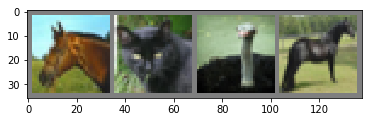

In [250]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img/2 + 0.5   #unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    
#get some random traning images
dataiter = iter(trainloader)
images, labels = dataiter.next()

#show images
imshow(torchvision.utils.make_grid(images))
#print labels
print(''.join('%5s' % classes[labels[j]] for j in range(4)))

### Define a Convolution Neural Network

In [251]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

### Define a Loss function and optimizer

In [252]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum = 0.9)

### Train the network

In [253]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        #get inputs
        inputs, labels  = data
        
        #zero the params gridents
        optimizer.zero_grad()
        
        #forward,backward,optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        #print statistic
        running_loss += loss.item()
        if i%2000 == 1999: # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss /2000))
            running_loss = 0.0
            
print('Finished Trianing')

[1,  2000] loss: 2.218
[1,  4000] loss: 1.888
[1,  6000] loss: 1.700
[1,  8000] loss: 1.593
[1, 10000] loss: 1.518
[1, 12000] loss: 1.442
[2,  2000] loss: 1.412
[2,  4000] loss: 1.353
[2,  6000] loss: 1.325
[2,  8000] loss: 1.322
[2, 10000] loss: 1.285
[2, 12000] loss: 1.260
Finished Trianing


### Test the network on the test data

#### We will check this by predicting the class label that the neural network outputs, 
#### and checking it against the ground-truth. If the prediction is correct, we add the 
#### sample to the list of correct predictions.
#### Okay, first step. Let us display an image from the test set to get familiar.

GroundTruth:   cat  ship  ship plane


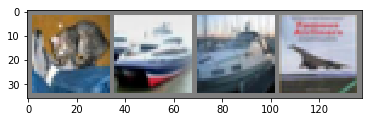

In [262]:
dataiter = iter(testloader)
images, labels = dataiter.next()

#print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth:', ' '.join('%5s'%classes[labels[j]] for j in range(4)))

In [263]:
#Okay, now let us see what the neural network thinks these examples above are:
outputs = net(images)

##### The outputs are energies for the 10 classes. Higher the energy for a class, 
##### the more the network thinks that the image is of the particular class. So, let’s get the index of the highest energy:

In [264]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat   car truck plane


##### Let us look at how the network performs on the whole dataset.

In [265]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 10 %


#### Hmmm, what are the classes that performed well, and the classes that did not perform well:

In [266]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        iamges, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
            
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 23 %
Accuracy of   car :  0 %
Accuracy of  bird :  0 %
Accuracy of   cat : 24 %
Accuracy of  deer :  0 %
Accuracy of   dog : 25 %
Accuracy of  forg :  0 %
Accuracy of horse : 25 %
Accuracy of  ship :  0 %
Accuracy of truck :  0 %


### Training on GPU

In [259]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assume that we are on a CUDA machine, then this should print a CUDA device:
print(device)

cpu


#### Then these methods will recursively go over all modules and convert their parameters and buffers to CUDA tensors:

In [260]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

#### Remember that you will have to send the inputs and targets at every step to the GPU too:

In [261]:
inputs, labels = inputs.to(device), labels.to(device)